In [1]:
# Importing libraries

#  Pandas library for data manipulation and analysis, particularly with DataFrames
import pandas as pd
# Numpy library used for arrays and functions involving numbers
import numpy as np
# A statistical data visualization library that is designed to make complex graphs easier to design
import seaborn as sns
# Core library in Python used for visualizations
import matplotlib.pyplot as plt
# Allows connections to databases, and enables SQL queries in Python
from sqlalchemy import create_engine
import matplotlib.ticker as mtick
# Allows higher-level interactive visualizations
import plotly.express as px
# Module that enables the use of regular expressions
import re

In [3]:
# Sets the amount of rows and columns to be displayed in table queries

pd.set_option('display.max.rows', 20000)
pd.set_option('display.max.columns', 40)

In [5]:
# Setting variables to be used in connections for each database that could potentially be used in data collection for this exercise

db1_user = 'root'
db1_password = 'generic'
db1_host = 'localhost'
db1_name = 'agriculture_animal'

db2_user = 'root'
db2_password = 'generic'
db2_host = 'localhost'
db2_name = 'agriculture_cereal'

db3_user = 'root'
db3_password = 'generic'
db3_host = 'localhost'
db3_name = 'agriculture_fruit'

db4_user = 'root'
db4_password = 'generic'
db4_host = 'localhost'
db4_name = 'agriculture_legumes'

db5_user = 'root'
db5_password = 'generic'
db5_host = 'localhost'
db5_name = 'agriculture_miscellaneous'

db6_user = 'root'
db6_password = 'generic'
db6_host = 'localhost'
db6_name = 'agriculture_nuts'

db7_user = 'root'
db7_password = 'generic'
db7_host = 'localhost'
db7_name = 'agriculture_oil_fat'

db8_user = 'root'
db8_password = 'generic'
db8_host = 'localhost'
db8_name = 'agriculture_sweeteners'

db9_user = 'root'
db9_password = 'generic'
db9_host = 'localhost'
db9_name = 'agriculture_vegetables'

In [7]:
# Creating connections with each database 

engine_db1 = create_engine(f'mysql+mysqlconnector://{db1_user}:{db1_password}@{db1_host}/{db1_name}')
engine_db2 = create_engine(f'mysql+mysqlconnector://{db2_user}:{db2_password}@{db2_host}/{db2_name}')
engine_db3 = create_engine(f'mysql+mysqlconnector://{db3_user}:{db3_password}@{db3_host}/{db3_name}')
engine_db4 = create_engine(f'mysql+mysqlconnector://{db4_user}:{db4_password}@{db4_host}/{db4_name}')
engine_db5 = create_engine(f'mysql+mysqlconnector://{db5_user}:{db5_password}@{db5_host}/{db5_name}')
engine_db6 = create_engine(f'mysql+mysqlconnector://{db6_user}:{db6_password}@{db6_host}/{db6_name}')
engine_db7 = create_engine(f'mysql+mysqlconnector://{db7_user}:{db7_password}@{db7_host}/{db7_name}')
engine_db8 = create_engine(f'mysql+mysqlconnector://{db8_user}:{db8_password}@{db8_host}/{db8_name}')
engine_db9 = create_engine(f'mysql+mysqlconnector://{db9_user}:{db9_password}@{db9_host}/{db9_name}')


In [9]:
# Saving all the information pulled from the databases into individual database variables

meat_db1 = pd.read_sql('SELECT * FROM total_meat_group', con=engine_db1)
offal_db1 = pd.read_sql('SELECT * FROM total_offal_group', con=engine_db1)
cereal_db2 = pd.read_sql('SELECT * FROM total_cereal_group', con=engine_db2)
fruit_db3 = pd.read_sql('SELECT * FROM total_fruit_group', con=engine_db3)
legumes_db4 = pd.read_sql('SELECT * FROM legumes_group', con=engine_db4)
# df_db5 = pd.read_sql('SELECT * FROM agriculture_sweenters_', con=engine_db5)
nuts_db6 = pd.read_sql('SELECT * FROM total_nuts_group', con=engine_db6)
seeds_db6 = pd.read_sql('SELECT * FROM total_seeds_group', con=engine_db6)
fat_db7 = pd.read_sql('SELECT * FROM fat_group', con=engine_db7)
oil_db7 = pd.read_sql('SELECT * FROM oil_group', con=engine_db7)
sweets_db8 = pd.read_sql('SELECT * FROM sweets_group', con=engine_db8)
vege_db9 = pd.read_sql('SELECT * FROM vege_group', con=engine_db9)

In [11]:
# Convert the 'Year' column to numeric, forcing non-numeric values to NaN (coerce)
meat_db1['Year'] = pd.to_numeric(meat_db1['Year'], errors='coerce')

# Filter the dataset to include only records from 2018 to 2022
meat_recent_years = meat_db1[(meat_db1['Year'] >= 2018) & (meat_db1['Year'] <= 2022)]

# Group by 'Country' and sum the 'Beef and Buffalo' production over the selected years
# Reset index to turn the grouped data back into a standard DataFrame
beef_by_country = meat_recent_years.groupby('Country')['Beef and Buffalo'].sum().reset_index()

# Define the regex pattern to exclude non-country entities like regions, economic groups, etc.
pattern = r'(?:Americas \(FAO\))|(?:Caribbean \(FAO\))|(?:Central America \(FAO\))|(?:China \(FAO\))|(?:Eastern Europe \(FAO\))|(?:Europe \(FAO\))|(?:Land Locked Developing Countries \(FAO\))|(?:Least Developed Countries \(FAO\))|(?:Low Income Food Deficit Countries \(FAO\))|(?:Low-income countries)|(?:Micronesia \(FAO\))|(?:Net Food Importing Developing Countries \(FAO\))|(?:Northern America \(FAO\))|(?:Northern Europe \(FAO\))|(?:Small Island Developing States \(FAO\))|(?:Western Europe \(FAO\))|(?:World)|(?:Upper-middle-income countries)|(?:High-income countries)|(?:Asia)|(?:North America)|(?:South America)|(?:Lower-middle-income countries)|(?:Africa)|(?:European Union \(27\))|(?:Oceania)'

# Filter out rows where 'Country' matches the regex pattern, i.e., remove non-country entries
beef_filtered_country = beef_by_country[~beef_by_country['Country'].str.contains(pattern, case=False, na=False)]

# Sort the data in descending order by 'Beef and Buffalo' production to get the top producers
beef_sorted = beef_filtered_country.sort_values(by='Beef and Buffalo', ascending=False)

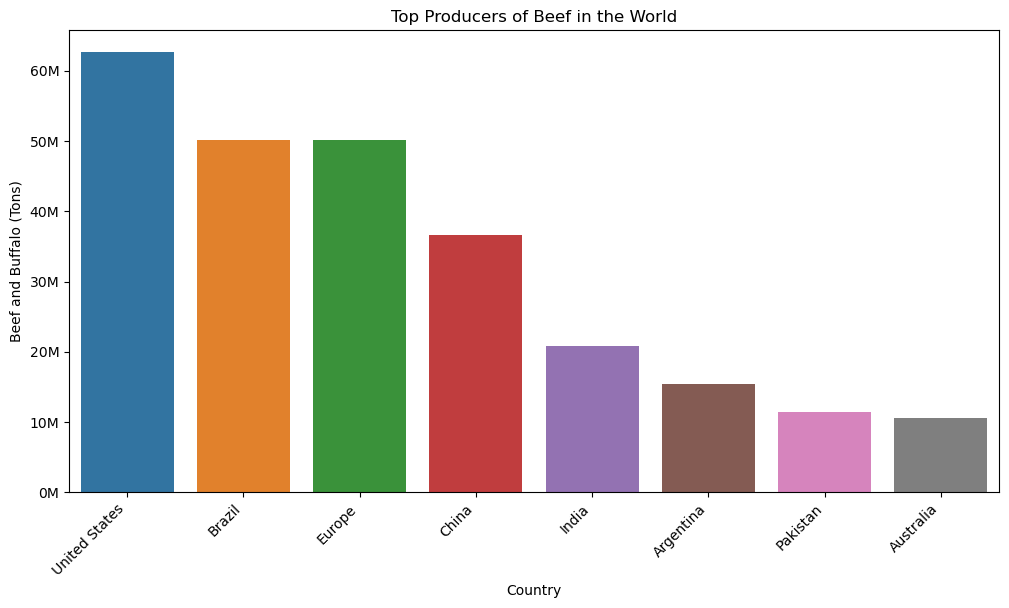

In [13]:

# Set figure size for better readability
plt.figure(figsize=(12,6))


# Create bar plot for top 8 beef producers
sns.barplot(x = 'Country', y = 'Beef and Buffalo', data = beef_sorted.head(8))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')


# Format y-axis to display values in millions (M)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1000000:,.0f}M'))

# Set title and axis labels
plt.title('Top Producers of Beef in the World')
plt.ylabel('Beef and Buffalo (Tons)')
plt.xlabel('Country')

# Show plot
plt.show()

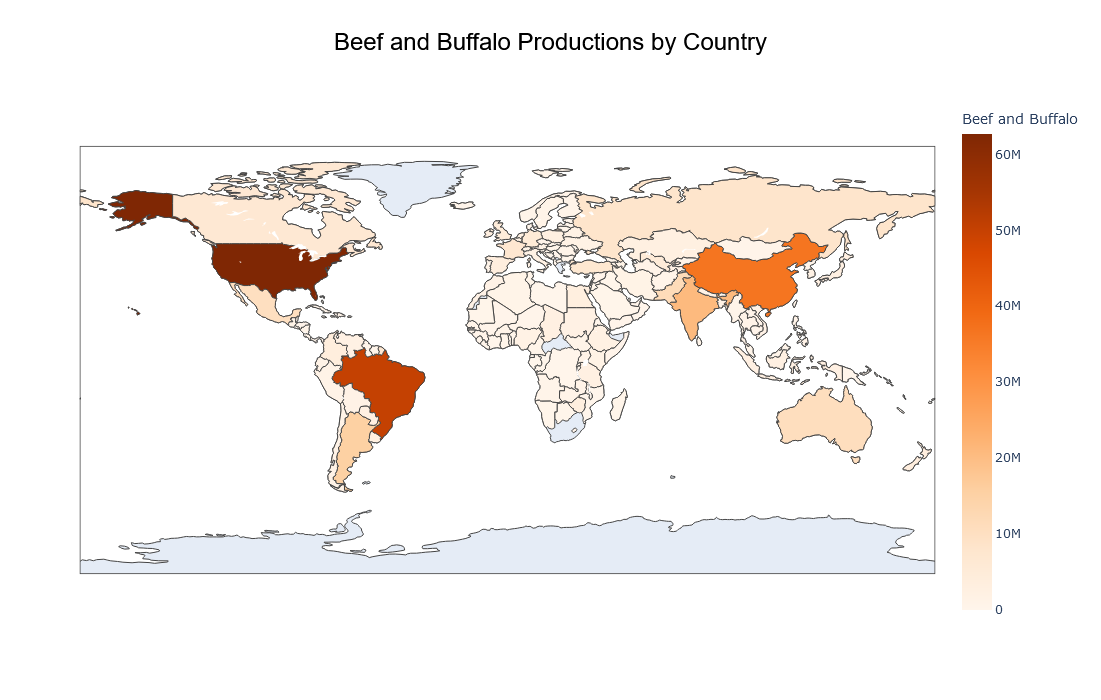

In [15]:


# Create choropleth map
beef_map = px.choropleth(
    beef_sorted,
    locations='Country', # Ensure country names match Plotly's recognized names
    locationmode='country names', # Use 'ISO-3' if names do not map correctly
    color='Beef and Buffalo', # Color by beef production
    title='Beef and Buffalo Productions by Country',
    color_continuous_scale='Oranges' # Set color gradient
)

# Update layout with size, centered title, and font adjustments
beef_map.update_layout(
    width=1100,
    height=700,
    title={
        'text': 'Beef and Buffalo Productions by Country', # Title text
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'font': {
            'size': 24,
            'family': 'Arial Bold, sans-serif', # 'Arial Bold' is not necessary
            'color': 'black'
        }
    }
)

# Display map
beef_map.show()

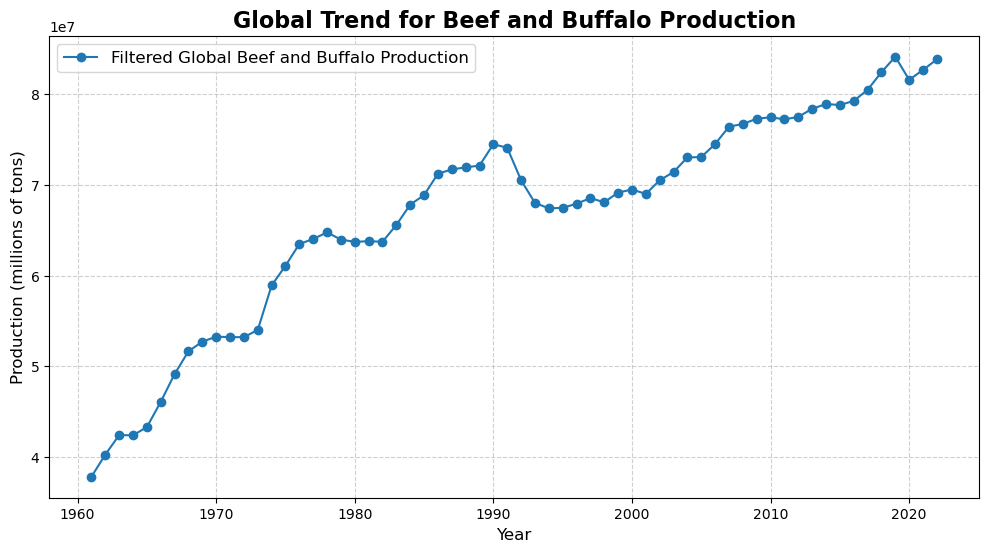

In [27]:
# Filter out non-country data using regex pattern
filtered_global_beef = meat_db1[~meat_db1['Country'].str.contains(pattern, case=False, na=False)]

# Group by 'Year' and sum beef production for a global trend
filtered_global_beef_trend = filtered_global_beef.groupby('Year')['Beef and Buffalo'].sum()

# Create the Line plot
plt.figure(figsize=(12, 6)) # Set figure size
plt.plot(filtered_global_beef_trend.index, filtered_global_beef_trend.values, marker='o', linestyle='-', label='Filtered Global Beef and Buffalo Production')

# Formatting the graph
plt.title("Global Trend for Beef and Buffalo Production", fontsize=16, fontweight='bold') # Bold title
plt.xlabel("Year", fontsize=12) # X-axis label
plt.ylabel("Production (millions of tons)", fontsize=12) # Y-axis label
plt.grid(True, linestyle='--', alpha=0.6) # Add grid for readability
plt.legend(fontsize=12) # Add legend

# Show plot
plt.show()


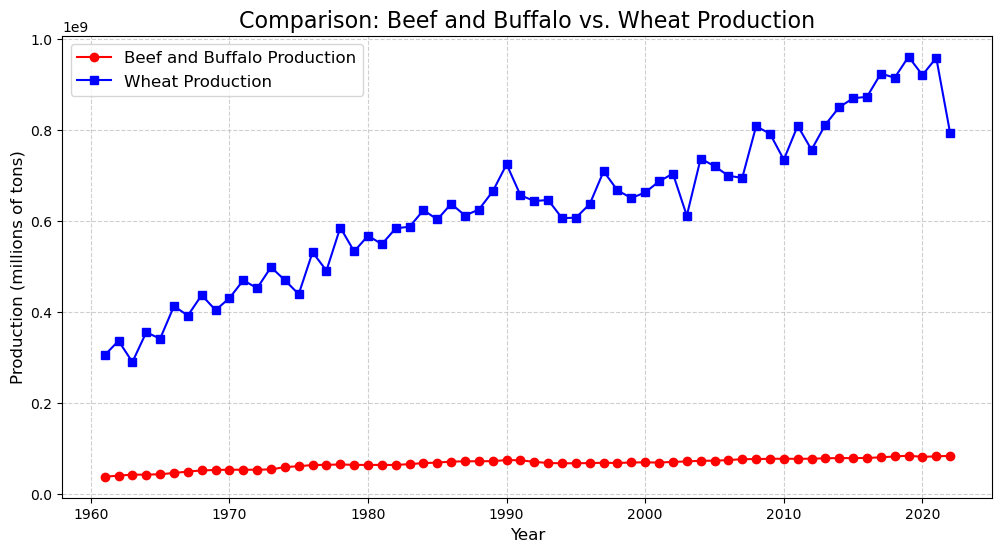

In [19]:


# Filter and group beef and buffalo data
filtered_global_beef = meat_db1[~meat_db1['Country'].str.contains(pattern, case=False, na=False)]
filtered_global_beef_trend = filtered_global_beef.groupby('Year')['Beef and Buffalo'].sum()

# Filter and group wheat data
filtered_global_cereal = cereal_db2[~cereal_db2['County'].str.contains(pattern, case=False, na=False)]
filtered_global_cereal_trend = filtered_global_cereal.groupby('Year')['Wheat'].sum()

# Create the overlay plot
plt.figure(figsize=(12, 6))

# Plot beef and buffalo production
plt.plot(filtered_global_beef_trend.index, filtered_global_beef_trend.values, marker='o', linestyle='-', color='red', label='Beef and Buffalo Production')


# Plot wheat production
plt.plot(filtered_global_cereal_trend.index, filtered_global_cereal_trend.values, marker='s', linestyle='-', color='blue', label='Wheat Production')

# Formatting the graph
plt.title('Comparison: Beef and Buffalo vs. Wheat Production', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Production (millions of tons)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Show plot
plt.show()

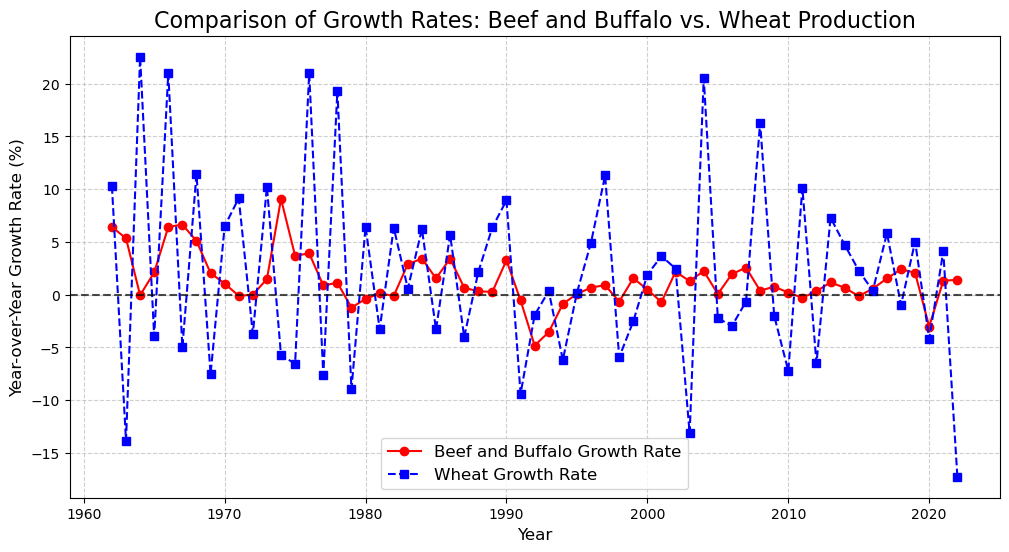

In [21]:
# Overlaying both Wheat and Beef charts on top of each other, but comparing growth rates as a percentage vs raw production weights

filtered_global_beef = meat_db1[~meat_db1['Country'].str.contains(pattern, case=False, na=False)]
filtered_global_beef_trend = filtered_global_beef.groupby('Year')['Beef and Buffalo'].sum()

filtered_global_cereal = cereal_db2[~cereal_db2['County'].str.contains(pattern, case=False, na=False)]
filtered_global_cereal_trend = filtered_global_cereal.groupby('Year')['Wheat'].sum()

# Creating variables to store the rate of change of each chart, so that growth between the two agricultural products can be examined more easily
beef_growth = filtered_global_beef_trend.pct_change() * 100  # Convert to percentage growth
cereal_growth = filtered_global_cereal_trend.pct_change() * 100  # Convert to percentage growth

plt.figure(figsize=(12, 6))

plt.plot(beef_growth.index, beef_growth.values, marker='o', linestyle='-', color='red', label='Beef and Buffalo Growth Rate')

plt.plot(cereal_growth.index, cereal_growth.values, marker='s', linestyle='--', color='blue', label='Wheat Growth Rate')

plt.title("Comparison of Growth Rates: Beef and Buffalo vs. Wheat Production", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Year-over-Year Growth Rate (%)", fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)  # Add a baseline for reference
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.show()


In [121]:
engine_db1.dispose()
engine_db2.dispose()
engine_db3.dispose()
engine_db4.dispose()
engine_db5.dispose()
engine_db6.dispose()
engine_db7.dispose()
engine_db8.dispose()
engine_db9.dispose()